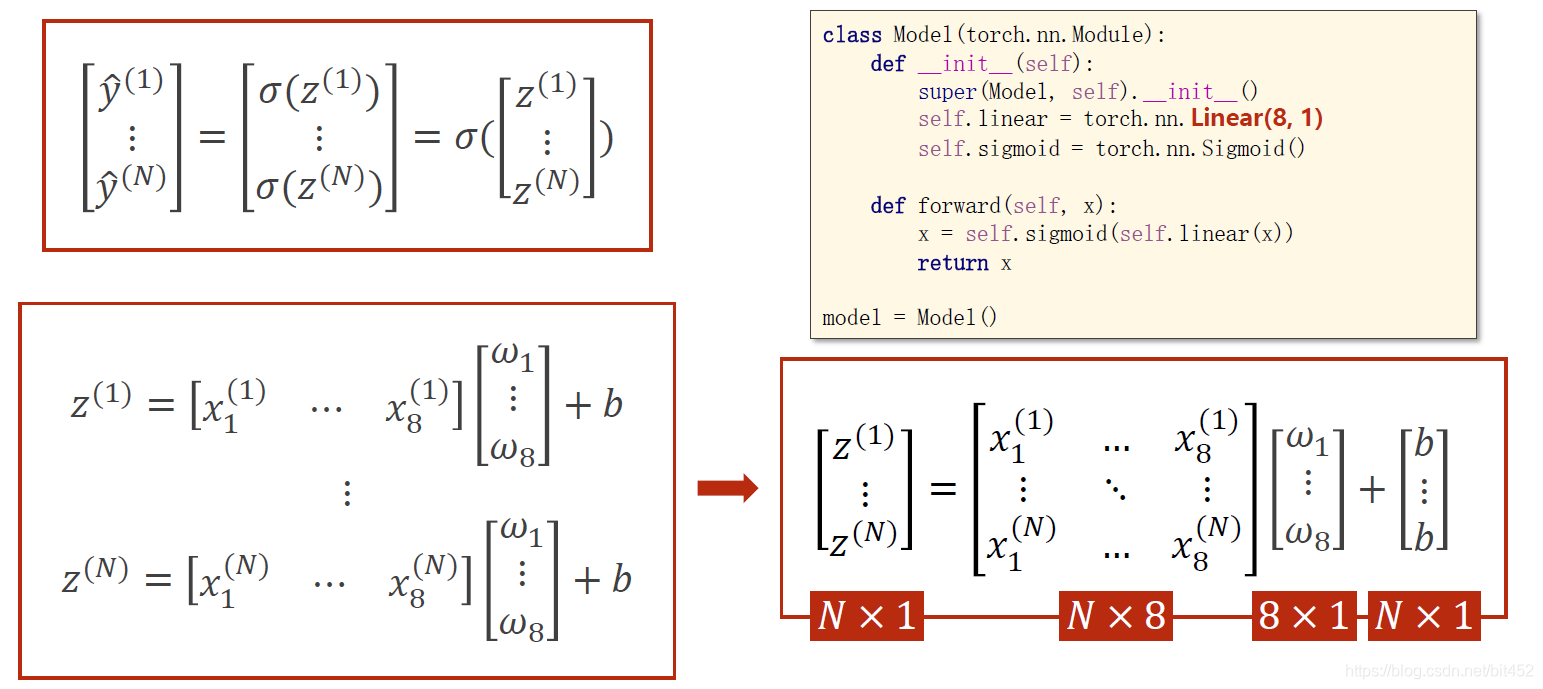

1、乘的权重(w)都一样，加的偏置(b)也一样。b变成矩阵时使用广播机制。神经网络的参数w和b是网络需要学习的，其他是已知的。

2、学习能力越强，有可能会把输入样本中噪声的规律也学到。我们要学习数据本身真实数据的规律，学习能力要有泛化能力。

3、该神经网络共3层；第一层是8维到6维的非线性空间变换，第二层是6维到4维的非线性空间变换，第三层是4维到1维的非线性空间变换。   通过增加层数加强学习能力更好的你和非线性的函数

4、本算法中torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用 

如果想查看某些层的参数，以神经网络的第一层参数为例，可按照以下方法进行。

参数说明

第一层的参数：

layer1_weight = model.linear1.weight.data

layer1_bias = model.linear1.bias.data

print("layer1_weight", layer1_weight)

print("layer1_weight.shape", layer1_weight.shape)

print("layer1_bias", layer1_bias)

print("layer1_bias.shape", layer1_bias.shape)

0 0.6523105502128601
layer1_weight tensor([[ 0.2091, -0.4040, -0.2968,  0.2718, -0.3777, -0.0018],
        [-0.2255, -0.1620, -0.3073, -0.0052,  0.2926,  0.3238],
        [ 0.3085,  0.1061,  0.3339, -0.1198,  0.1360, -0.2104],
        [-0.3979,  0.1725, -0.2475,  0.2405, -0.0794, -0.3441]])
layer1_weight.shape torch.Size([4, 6])
layer1_bias tensor([ 0.2936,  0.3775,  0.0517, -0.0842])
layer1_bias.shape torch.Size([4])
1 0.6515728235244751
layer1_weight tensor([[ 0.2096, -0.4036, -0.2963,  0.2722, -0.3773, -0.0014],
        [-0.2254, -0.1620, -0.3072, -0.0052,  0.2927,  0.3238],
        [ 0.3086,  0.1062,  0.3341, -0.1197,  0.1361, -0.2102],
        [-0.3980,  0.1724, -0.2476,  0.2404, -0.0795, -0.3442]])
layer1_weight.shape torch.Size([4, 6])
layer1_bias tensor([ 0.2942,  0.3776,  0.0519, -0.0843])
layer1_bias.shape torch.Size([4])
2 0.6509075164794922
layer1_weight tensor([[ 0.2100, -0.4031, -0.2959,  0.2726, -0.3769, -0.0010],
        [-0.2254, -0.1619, -0.3072, -0.0051,  0.2927,  0.

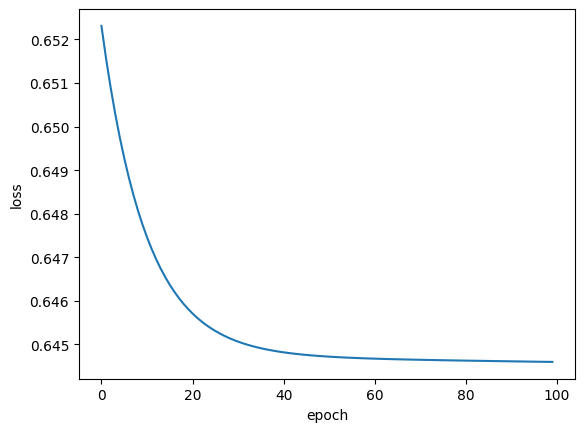

In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv.gz', delimiter=',', dtype=np.float32 ,skiprows=1)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵

# print(x_data)
# print(y_data)
 
# design model using class

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
        self.ReLU = torch.nn.ReLU()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
    layer2_weight = model.linear2.weight.data
    layer2_bias = model.linear2.bias.data
    print("layer1_weight", layer2_weight)
    print("layer1_weight.shape", layer2_weight.shape)
    print("layer1_bias", layer2_bias)
    print("layer1_bias.shape", layer2_bias.shape)
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [3]:
from sklearn.datasets import load_diabetes  
data_diabetes = load_diabetes()    
data =  data_diabetes['data']
target = data_diabetes['target']
feature_names = data_diabetes['feature_names']
print(data[0])
print(data.size)
print(target[0])
print(target.size)
print(feature_names)

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
4420
151.0
442
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [14]:
ls

diabetes.csv.gz


根据评论区的提示，更改epoch为100000，以准确率acc为评价指标，源代码和结果如下


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv.gz', delimiter=',', dtype=np.float32, skiprows = 1)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
print("input data.shape", x_data.shape)
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# print(x_data.shape)
# design model using class
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 2)
        self.linear4 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        x = self.sigmoid(self.linear4(x))  # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
# training cycle forward, backward, update
for epoch in range(1000000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    if epoch%100000 == 99999:
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))   #  大于50%概率就为1，反之为0
 
        acc = torch.eq(y_pred_label, y_data).sum().item()/y_data.size(0)
        print("loss = ",loss.item(), "acc = ",acc)

input data.shape torch.Size([758, 8])
loss =  0.40879786014556885 acc =  0.8073878627968337
